In [1]:
import os
os.chdir("C:\\Users\\Lenovo\\Desktop\\New folder\\LetsUpgrade_Python_Aug\\LR")

In [2]:
os.getcwd()

'C:\\Users\\Lenovo\\Desktop\\New folder\\LetsUpgrade_Python_Aug\\LR'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import the titanic dataset 
df = pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
# Dropping non-significant variable
# PassengerId
# Name
# Ticket
# Fare

In [ ]:
# Retained below varaibles
# Survived - dependent variable
# Pclass
# Sex
# Age
# SibSp
# Parch
# Cabin
# Embarked

In [7]:
# Imbalanced dataset - checks
# see distinct values in the Survived column
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
549/891

0.6161616161616161

In [8]:
342/891

0.3838383838383838

In [8]:
# see distinct values in the sex column
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# checking missing value in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#x = df.iloc[:,]

In [12]:
177/891

0.19865319865319866

In [11]:
# create the new dataframe where we have only independent varaible and store in X dataframe
X = pd.DataFrame()
X['Pclass'] = df['Pclass']
X['Sex'] = df['Sex']
X['Age'] = df['Age']
X['SibSp'] = df['SibSp']
X['Parch'] = df['Parch']
X['Embarked'] = df['Embarked']

In [12]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
5,3,male,NaN,0,0,Q
6,1,male,54.0,0,0,S
7,3,male,2.0,3,1,S
8,3,female,27.0,0,2,S
9,2,female,14.0,1,0,C


In [13]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
# check missing data into independent variable
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  889 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

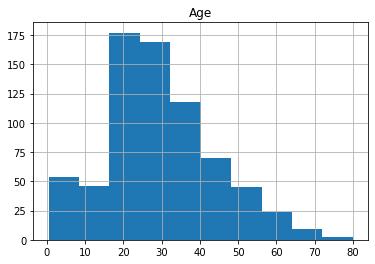

In [16]:
# check outlier in Age variable
# There is a skewness in this historical plot, hence, outlier is there
X.hist("Age")

<AxesSubplot:ylabel='Age'>

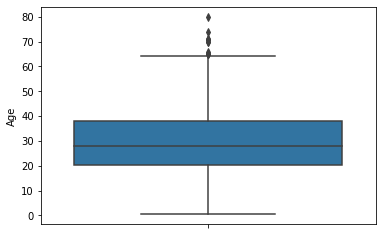

In [17]:
sns.boxplot(y='Age', data=X)
# very simple - there is an outlier
# impute - median method

In [18]:
X['Age'] = X['Age'].fillna(X.Age.median())
print(X.Age.isnull().sum())

0


In [19]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [20]:
X['Embarked'] = X['Embarked'].fillna(X.Embarked.mode()[0]) # row wise

In [21]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [ ]:
# Label encoder is required
# Sex, Embarked and Pclass
# Domain part 

In [23]:
# Sex column
X['Sex'] = pd.get_dummies(X.Sex)['female']
X.Sex[:10]

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Sex, dtype: uint8

In [24]:
X.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [25]:
X = X.join(pd.get_dummies(df.Pclass, prefix='Pclass'))

In [26]:
display(X[:10])

,Pclass,Sex,Age,SibSp,Parch,Embarked,Pclass_1,Pclass_2,Pclass_3
0,3,0,22.0,1,0,S,0,0,1
1,1,1,38.0,1,0,C,1,0,0
2,3,1,26.0,0,0,S,0,0,1
3,1,1,35.0,1,0,S,1,0,0
4,3,0,35.0,0,0,S,0,0,1
5,3,0,28.0,0,0,Q,0,0,1
6,1,0,54.0,0,0,S,1,0,0
7,3,0,2.0,3,1,S,0,0,1
8,3,1,27.0,0,2,S,0,0,1
9,2,1,14.0,1,0,C,0,1,0


In [27]:
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#X[:,0] = label.fit_transform(X[:,0])

In [28]:
X = X.drop(['Pclass','Pclass_1'], axis=1)
X.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass_2,Pclass_3
0,0,22.0,1,0,S,0,1
1,1,38.0,1,0,C,0,0
2,1,26.0,0,0,S,0,1
3,1,35.0,1,0,S,0,0
4,0,35.0,0,0,S,0,1


In [29]:
X = X.join(pd.get_dummies(df.Embarked, prefix='Embarked'))

In [30]:
X.head(10)

,Sex,Age,SibSp,Parch,Embarked,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,S,0,1,0,0,1
1,1,38.0,1,0,C,0,0,1,0,0
2,1,26.0,0,0,S,0,1,0,0,1
3,1,35.0,1,0,S,0,0,0,0,1
4,0,35.0,0,0,S,0,1,0,0,1
5,0,28.0,0,0,Q,0,1,0,1,0
6,0,54.0,0,0,S,0,0,0,0,1
7,0,2.0,3,1,S,0,1,0,0,1
8,1,27.0,0,2,S,0,1,0,0,1
9,1,14.0,1,0,C,1,0,1,0,0


In [31]:
X = X.drop(['Embarked','Embarked_C'], axis=1)
X.head(10)

,Sex,Age,SibSp,Parch,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,1,0,1
1,1,38.0,1,0,0,0,0,0
2,1,26.0,0,0,0,1,0,1
3,1,35.0,1,0,0,0,0,1
4,0,35.0,0,0,0,1,0,1
5,0,28.0,0,0,0,1,1,0
6,0,54.0,0,0,0,0,0,1
7,0,2.0,3,1,0,1,0,1
8,1,27.0,0,2,0,1,0,1
9,1,14.0,1,0,1,0,0,0


In [ ]:
# pre-processing
# 1) imablanced - only for classification problem
# 2) missing value - for all
# 3) outlier - linear regression
# 4) label encoder - wherever required
# 5) feature scaling - wherever required

# model building 


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=555)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 8)
(268, 8)
(623,)
(268,)


In [67]:
# Building Logistic Regression Model (Generalised linear Model)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [68]:
model.intercept_

array([1.45275495])

In [69]:
model.coef_

array([[ 2.31457316, -0.03556602, -0.3452905 ,  0.01572844, -0.55375675,
        -1.98728615, -0.050588  , -0.5771137 ]])

In [70]:
y_pred = model.predict(X_test)

In [71]:
print(y_pred)
print(y_test)

[1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1
 0 0 0 0 0 1 1 1 0]
875    1
594    0
132    0
232    0
505    0
      ..
791    0
871    1
615    1
366    1
324    0
Name: Survived, Length: 268, dtype: int64


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8507462686567164

In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[116,  18],
       [ 25,  64]], dtype=int64)

In [45]:
(116+64)/(116+18+25+64)

0.8071748878923767

In [ ]:
# imbalanced dataset - done
# Different algorithm - Decision Tree and Random Forest
# How to improve your model

In [ ]:
# Decision Tree 
# Gini 
# Entropy
# Information Gain
# Chi-Square Test
# pre and post prunning
# root node, branch node, leaf node, decision node, parent-childern node etc

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
dtree1 = DecisionTreeClassifier(criterion='entropy')
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
dtree_pred = dtree.predict(X_test)

In [49]:
dtree1_pred = dtree1.predict(X_test)

In [46]:
print(dtree_pred)
print(y_pred)

[0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0]


In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree_pred)

0.7488789237668162

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dtree1_pred)

0.757847533632287

In [ ]:
# Logistic Regression - 0.8071748878923767
# Decision Tree (Gini) - 0.7488789237668162
# Decision Tree (entropy) - 0.757847533632287

In [51]:
# Random Forest - 
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy', n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1)

In [77]:
rf_pred = rfc.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_pred)

0.8171641791044776

In [ ]:
# Logistic Regression - 0.8071748878923767
# Decision Tree (Gini) - 0.7488789237668162
# Decision Tree (entropy) - 0.757847533632287
# Random Forest : 0.8026905829596412 - my prefrence would be RF

In [ ]:
# Ensemble 
# Bagging - RF
# Boosting = XGBoost
# Stacking
# Cascading 

In [ ]:
# Classification Model
# 1) Logistic 
# 2) Decision Tree
# 3) Bagging
# 4) Random Forest
# 5) AdaBoost
# 6) Gradient Boosting
# 7) XGboost
# 8) K Nearest Neighbors - KNN
# 9) Support Vector Maching (SVM) - Kernel = 'linear','Polynomial','Sigmoid','rbf'
# 10) Naive Bayes Theorem - Probability theorem

# boostup
# K-Fold method - improve the accuracy

# XGBoost model - ensemble techniques

In [55]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier

In [57]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:56:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
xgb_model_pred = xgb_model.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, xgb_model_pred)

0.7757847533632287

In [ ]:
# Logistic Regression - 0.8071748878923767
# Decision Tree (Gini) - 0.7488789237668162
# Decision Tree (entropy) - 0.757847533632287
# Random Forest : 0.8026905829596412 - my prefrence would be RF
# XGBoost - 0.7757847533632287

In [73]:
# Boosting Techniques (K-Fold Method)

# improving accuracy for logistic regression (model)
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator =model, X=X_train, y=y_train, cv=20 )
accuracy

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.84375   , 0.6875    , 0.8125    , 0.80645161, 0.64516129,
       0.87096774, 0.74193548, 0.87096774, 0.74193548, 0.83870968,
       0.70967742, 0.93548387, 0.83870968, 0.83870968, 0.67741935,
       0.80645161, 0.67741935, 0.77419355, 0.70967742, 0.87096774])

In [62]:
accuracy[9]

0.9393939393939394

In [ ]:
# Logistic Regression - 94% - k-fold = 10
# Logistic Regression - 95.5% - k-fold = 15
# Logistic Regression - 96.9% - k-fold = 20
# Random Forest : 0.875 k-fold = 20

In [80]:

# Boosting Techniques (K-Fold Method)

# improving accuracy for logistic regression (model)
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator =rfc, X=X_train, y=y_train, cv=20)
accuracy

array([0.84375   , 0.78125   , 0.875     , 0.80645161, 0.70967742,
       0.83870968, 0.74193548, 0.83870968, 0.74193548, 0.83870968,
       0.74193548, 0.87096774, 0.83870968, 0.87096774, 0.70967742,
       0.77419355, 0.67741935, 0.87096774, 0.67741935, 0.80645161])